In [123]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.offline as po
import os

In [2]:
d=pd.read_csv("gdp.csv")

In [3]:
d.head()

,Country Name,Country Code,Year,Value
0,Arab World,ARB,1968,2.576068e+10
1,Arab World,ARB,1969,2.843420e+10
2,Arab World,ARB,1970,3.138550e+10
3,Arab World,ARB,1971,3.642691e+10
4,Arab World,ARB,1972,4.331606e+10


In [32]:
d1=d.values


In [33]:
for i in d1:
    if i[0]=="India":
        if i[2]==1993:
            a=i[3]
        if i[2]==1994:
            b=i[3]
            break
        
print((b-a)/a)        

0.17178748210146075


In [34]:
print(d["Year"].min(),d["Year"].max())

1960 2016


In [35]:
a=d.values
gdp=[0]
for i in range(1,len(a)):
    p,c=a[i-1][3],a[i][3]
    gdp.append(round((c-p)/p*100,2))

In [105]:
d=d.assign(GDP=gdp)
d

,Country Name,Country Code,Year,Value,GDP
0,Arab World,ARB,1968,2.576068e+10,0.00
1,Arab World,ARB,1969,2.843420e+10,10.38
2,Arab World,ARB,1970,3.138550e+10,10.38
3,Arab World,ARB,1971,3.642691e+10,16.06
4,Arab World,ARB,1972,4.331606e+10,18.91
...,...,...,...,...,...
11502,Zimbabwe,ZWE,2012,1.424249e+10,17.72
11503,Zimbabwe,ZWE,2013,1.545177e+10,8.49
11504,Zimbabwe,ZWE,2014,1.589105e+10,2.84
11505,Zimbabwe,ZWE,2015,1.630467e+10,2.60


In [72]:
for i in x.values:
    if i[0]=="World" and i[2]==1969:
        print(i[3])

2690797713906.75


In [114]:
d["Value"].describe()
d[d["Value"]==d["Value"].max()]

,Country Name,Country Code,Year,Value,GDP
2303,World,WLD,2014,7.904923e+13,2.67


In [115]:
a=d["Country Name"].unique()
len(a)

256

<AxesSubplot:xlabel='YEARS', ylabel='GDP'>

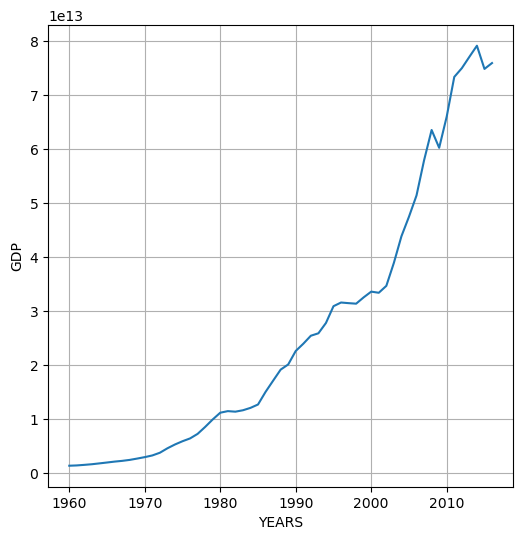

In [111]:

y=d[d["Country Name"]=="World"]
y.plot(kind = 'line', x = 'Year', y = 'Value',
           figsize = (6,6),
           legend = False,
           grid = True,
           ylabel = 'GDP',
           xlabel = 'YEARS')


In [103]:
d.groupby("Country Name").max()["Value"].sort_values(ascending=False)

Country Name
World                        7.904923e+13
High income                  5.036240e+13
OECD members                 4.937008e+13
Post-demographic dividend    4.673504e+13
IDA & IBRD total             2.948247e+13
                                 ...     
Palau                        3.102483e+08
Marshall Islands             1.944979e+08
Kiribati                     1.880457e+08
Nauru                        1.170204e+08
Tuvalu                       3.987575e+07
Name: Value, Length: 256, dtype: float64

In [126]:
d1=d[d["Country Name"]=="India"]
fig=px.line(d1,x="Year",y="Value",title="India GDP Analysis",range_y=[0,80000000000000])
fig

In [128]:
po.plot(fig,filename="India GDP.html",auto_open=False)

'India GDP.html'

In [131]:
#os.mkdir("GDP analysis")
for i in d["Country Name"].unique():
    d1=d[d["Country Name"]==i]
    fig=px.line(d1,x="Year",y="Value",title=i+ "GDP Analysis")
    po.plot(fig,filename="GDP analysis/"+i+".html",auto_open=False)

In [135]:
fig=px.line(d,x="Year",y="Value",title="GDP Analysis",color="Country Name")
po.plot(fig,filename="GDP of all Countries.html")

'GDP of all Countries.html'

In [138]:
c1=d[d["Country Name"]=="China"]
c2=d[d["Country Name"]=="India"]
c=pd.concat((c1,c2),axis=0)

In [175]:
fig=px.line(c,x="Year",y="Value",title="GDP Analysis of India and China",color="Country Name")
#po.plot(fig,filename="GDP of China and India  Countries.html")
fig

In [180]:
def gdp(lst,isOpen):
    s=[]
    for i in lst:
        s.append(d[d["Country Name"]==i])
        a=pd.concat(s,axis=0)
    fig=px.line(a,x="Year",y="Value",title="GDP Analysis of"+"|".join(lst),color="Country Name")
    po.plot(fig,filename="_".join(lst)+".html",auto_open=isOpen)


In [183]:
gdp(["India","China","Arab World"],False)